In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Datasets

In [4]:
org_data=pd.read_csv('diabetes_prediction_dataset.csv')
org_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


BMI stands for Body Mass Index — it’s a numerical value that estimates body fat based on a person’s weight and height.

HbA1c (Hemoglobin A1c) is a blood test that measures the average blood sugar (glucose) level over the past 2–3 months.
<5.7 is normal & 5.7 - 6.4 is prediabetes & > 6.6 is diabetes

Blood glucose level (or blood sugar level) measures the amount of glucose in your blood at a specific moment. Glucose is the main sugar in your blood and your body’s primary source of energy.

Unlike HbA1c, which shows average blood sugar over months, blood glucose is an instant measurement. 70-90mg is normal & >140 is diabetes

In [8]:
#Data cleaning

In [9]:
org_data.shape

(100000, 9)

In [10]:
org_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
org_data.duplicated().sum()

np.int64(3854)

In [12]:
org_data.drop_duplicates(inplace=True)

In [13]:
org_data.shape

(96146, 9)

In [14]:
#Explority Data Analysis

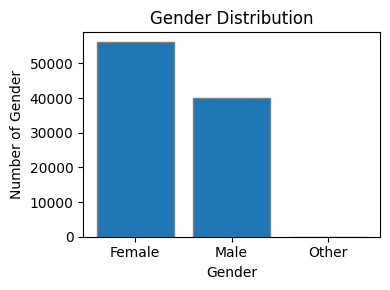

In [15]:
gender_count=org_data['gender'].value_counts()

plt.figure(figsize=(4,3))
plt.bar(gender_count.index,gender_count.values,edgecolor='grey')
plt.xlabel('Gender')
plt.ylabel('Number of Gender')
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

In [16]:
df1=org_data.copy()

In [17]:
#converting age values into real values

In [18]:
def convert_age(value):
    min_age=15
    max_age=80
    
    #if value scaled
    if 0<=value<=1:
        return round(value*(max_age-min_age)+min_age)   
    #if the value has less than<15
    elif value<=15:
        return np.nan
    #if the value is 56.0 this actual age
    else:
        return int(round(value))

df1['age']=df1['age'].apply(convert_age)

In [19]:
df1['age'].fillna(method='bfill',axis=0,inplace=True)

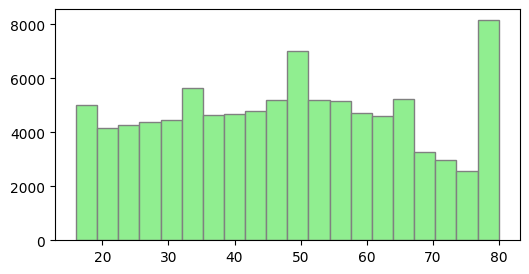

In [20]:
plt.figure(figsize=(6,3))
plt.hist(df1['age'],bins=20,color='lightgreen',edgecolor='grey')
plt.show()

In [21]:
import seaborn as sns

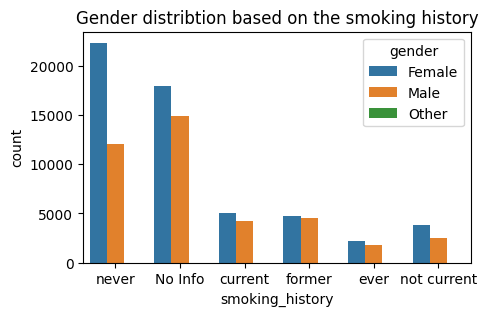

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x='smoking_history',data=df1,hue='gender')
plt.title('Gender distribtion based on the smoking history')
plt.show()

In [23]:
df1.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [24]:
#Label Encoding

In [25]:
df1['gender']=df1['gender'].map({'Female':0,'Male':1})
df1['smoking_history']=df1['smoking_history'].map({'never':0,'No Info':-1,'current':1,'former':2,'ever':3,'not current':2})

In [26]:
df1.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0,25.19,6.6,140,0
1,0.0,54.0,0,0,-1,27.32,6.6,80,0


In [27]:
#Defineing Input & Output Variables

In [28]:
input_data=df1.iloc[:,:-1]
target_data=df1.iloc[:,-1]

In [29]:
#Scaleing the input data

In [30]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)

In [31]:
#Spliting the data

In [32]:
x_train,x_test,y_train,y_test=train_test_split(input_data,target_data,test_size=0.25,random_state=42)

In [33]:
#Importing all the libareys

In [34]:
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
from keras.regularizers import L2
from keras.layers import Dropout

In [35]:
ann=Sequential()

In [36]:
ann.add(Dense(8,input_dim=8,activation='relu',kernel_regularizer=L2(l2=0.01)))
ann.add(BatchNormalization())
ann.add(Dense(6,activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(4,activation='relu'))
ann.add(BatchNormalization())
ann.add(Dense(1,activation='sigmoid'))

In [37]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
ann.fit(x_train,y_train,batch_size=200,epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9003 - loss: nan - val_accuracy: 0.9098 - val_loss: nan
Epoch 2/50
361/361 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9124 - loss: nan - val_accuracy: 0.9098 - val_loss: nan


In [39]:
#Ploting the train and test accuracy

In [40]:
trian_accuracy=ann.history.history['accuracy']
test_accuracy=ann.history.history['val_accuracy']

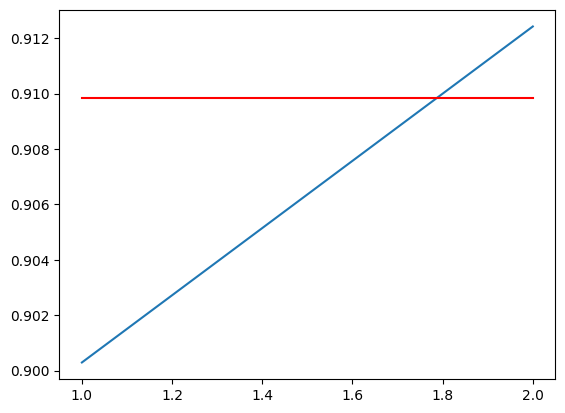

In [70]:
plt.plot([i for i in range(1,3)],trian_accuracy)
plt.plot([i for i in range(1,3)],test_accuracy,color='red')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score

In [56]:
#Finding the accuracy of training Data

In [58]:
train_pred=ann.predict(x_train)
tr_pd=[]

for i in train_pred:
    if i > 0.5:
        tr_pd.append(1)
    else:
        tr_pd.append(0)
accuracy_score(y_train,tr_pd)*100

2254/2254 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


91.24242466266347

In [60]:
#Finding the accuracy of testing data

In [62]:
test_pred=ann.predict(x_test)
te_pd=[]

for i in test_pred:
    if i > 0.5:
        te_pd.append(1)
    else:
        te_pd.append(0)
accuracy_score(y_test,te_pd)*100

752/752 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


90.9847318716978

In [ ]:
#Predicting the values

In [64]:
pred=ann.predict(np.array([[-0.843594,-1.420866,-0.29005,-0.206248,-0.171266,0.215515,-0.962154,1.510204]]))
pr=[]
for i in pred:
    if i > 0.5:
        pr.append(1)
    else:
        pr.append(0)
pr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


[0]

In [68]:
import pickle
with open('Diabetes_prediction.pickle','wb') as f:
    pickle.dump(ann,f)

In [82]:
import json
dia_columns={
    'data_columns' : [col.lower() for col in input_data.columns]
}
with open('dia_columns.json','w') as f:
    f.write(json.dumps(dia_columns))